In [1]:
# ! pip install yfinance
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt

# Get data from yahoo finance
sd = dt.datetime(1998,12,4)
ed = dt.datetime(2023,2,23)
qqq2 = ab.StockData('QQQ')
qqq2.get_data_from_yfinance('QQQ', sd, ed)

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

[*********************100%***********************]  1 of 1 completed


In [14]:
#buy and hold strategy vs moving average cross strategy
test_start = dt.datetime(2010,1,1)
test_end = dt.datetime(2020,1,1)

buy_and_hold = ab.BuyAndHold() 
buy_and_hold.run_strategy(qqq2, test_start,test_end)
bt = ab.BackTest(test_start, test_end)
bt.run_backtest(buy_and_hold, qqq2)

macross_strategy = ab.MACross(50, 200)
macross_strategy.run_strategy(qqq2, test_start ,test_end)
ma_cross_bt = ab.BackTest(test_start, test_end)
ma_cross_bt.run_backtest(macross_strategy, qqq2)

threshold_strategy = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
threshold_strategy.run_strategy(qqq2, test_start , test_end)
naa200r_threshold_bt = ab.BackTest(test_start , test_end)
naa200r_threshold_bt.run_backtest(threshold_strategy, qqq2)

ma_threshold = ab.MAThreshold(ma_window = 200, buy_threshold = 1.05, sell_threshold = 0.95)
ma_threshold.run_strategy(qqq2, test_start,test_end)
ma_threshold_bt = ab.BackTest(test_start, test_end)
ma_threshold_bt.run_backtest(ma_threshold, qqq2)

ma_threshold2 = ab.MAThreshold(ma_window = 200, buy_threshold = 1.03, sell_threshold = 0.95)
ma_threshold2.run_strategy(qqq2, test_start,test_end)
ma_threshold2_bt = ab.BackTest(test_start, test_end)
ma_threshold2_bt.run_backtest(ma_threshold2, qqq2)

# #print balance at the end of the backtest
# print(macross_strategy.trades)
# print('buy and hold:',bt.balance['Total'].iloc[-1])
# print('moving   avg:',ma_cross_bt.balance['Total'].iloc[-1])



In [15]:
bt.performance_summary('Buy and Hold')
ma_cross_bt.performance_summary('MA Crossing, 50, 200')
naa200r_threshold_bt.performance_summary('NAA200R, 15, 30')
ma_threshold_bt.performance_summary('Price to SMA 200, 5% BUY, -5% SELL')
ma_threshold2_bt.performance_summary('Price to SMA 200, 3% BUY, -5% SELL')



        
        Performance Summary of Buy and Hold: 
        cumulative return:358.01%, 
        sharp_ratio: 6.11%, 
        max_drawdown: -23.16%, 
        average of daily return:0.0665%, 
        std of daily return: 1.0884%,
        number of trades: 2
        
        

        
        Performance Summary of MA Crossing, 50, 200: 
        cumulative return:197.15%, 
        sharp_ratio: 5.25%, 
        max_drawdown: -21.41%, 
        average of daily return:0.0474%, 
        std of daily return: 0.9031%,
        number of trades: 8
        
        

        
        Performance Summary of NAA200R, 15, 30: 
        cumulative return:322.12%, 
        sharp_ratio: 6.53%, 
        max_drawdown: -15.93%, 
        average of daily return:0.0618%, 
        std of daily return: 0.9457%,
        number of trades: 19
        
        

        
        Performance Summary of Price to SMA 200, 5% BUY, -5% SELL: 
        cumulative return:118.51%, 
        sharp_ratio: 4.21%, 
        

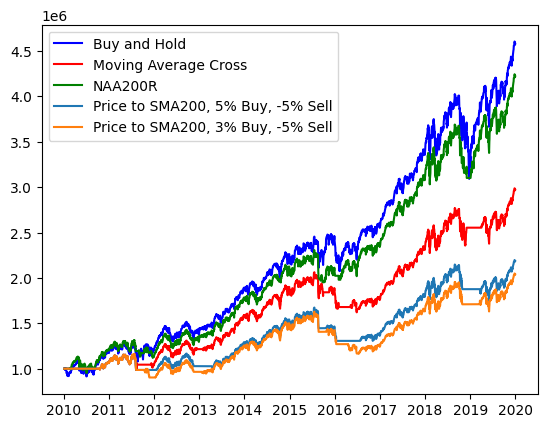

In [17]:
plt.plot(bt.balance['Date'], bt.balance['Total'], label = 'Buy and Hold',color = 'blue')
plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'], label = 'Moving Average Cross', color = 'red')
plt.plot(naa200r_threshold_bt.balance['Date'], naa200r_threshold_bt.balance['Total'], label = 'NAA200R', color = 'green')
plt.plot(ma_threshold_bt.balance['Date'], ma_threshold_bt.balance['Total'], label = 'Price to SMA200, 5% Buy, -5% Sell')
plt.plot(ma_threshold2_bt.balance['Date'], ma_threshold2_bt.balance['Total'], label = 'Price to SMA200, 3% Buy, -5% Sell')

plt.legend()

<AxesSubplot: xlabel='Date'>

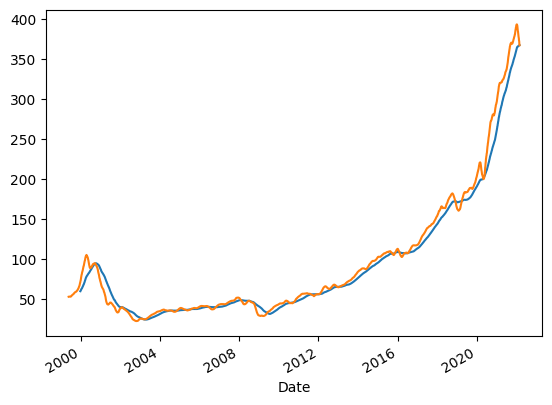

In [ ]:
#qqq2.data['Close'].plot()
qqq2.data['LongMA'].plot()
qqq2.data['ShortMA'].plot()

In [14]:
#backtest buy and hold strategy over 5 year periods
#starting date 30 days apart
sd = dt.datetime(2000,1,1)
ed = dt.datetime(2017,1,1)
hold_period = 365*5
delta = ed - sd
result = []
for i in range(0, delta.days + 1, 30):
    sd_5y = sd + dt.timedelta(days=i)
    ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=hold_period)
    buy_and_hold_strategy = None
    buy_and_hold_strategy = ab.BuyAndHold()
    buy_and_hold_strategy.run_strategy(qqq2, sd_5y, ed_5y)
    bt = None
    bt = ab.BackTest(sd_5y, ed_5y,1)
    bt.run_backtest(buy_and_hold_strategy, qqq2)
    result.append([sd_5y,bt.balance['Total'].iloc[-1]])
#    print(i, sd_5y, ed_5y, bt.balance['Total'].iloc[-1])

print(result)
plt.plot([x[0] for x in result], [x[1] for x in result])

KeyboardInterrupt: 

In [38]:
sd = dt.datetime(2014,1,1)
hold_period = 365*5
result = []
i=0
sd_5y = sd + dt.timedelta(days=i)
ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=hold_period)
buy_and_hold_strategy = None
buy_and_hold_strategy = ab.BuyAndHold()
buy_and_hold_strategy.run_strategy(qqq2, sd_5y, ed_5y)
bt = None
bt = ab.BackTest(sd_5y, ed_5y,1)
bt.run_backtest(buy_and_hold_strategy, qqq2)
result.append([sd_5y,bt.balance['Total'].iloc[-1]])

In [39]:
result

[[datetime.datetime(2014, 1, 1, 0, 0), 1.7676177431031435]]

In [ ]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
#start_date = '2003-03-10'
#end_date = '2023-01-01'

start_date = dt.datetime(2003,3,10)
end_date = dt.datetime(2023,1,1)

ticker = 'QQQ'

period= 'max'
interval ='1d'

[*********************100%***********************]  1 of 1 completed
1999-03-10 00:00:00 51.0625
Empty DataFrame
Columns: [Date, Ticker, Action, Price]
Index: []


In [ ]:
#data = yf.Ticker(ticker).history(period= period,interval =interval,start =start_date,end = end_date,prepost=False, actions=True,auto_adjust=True, back_adjust=False,proxy=None, rounding=False, timeout=None)
#data.index = data.index.strftime('%Y-%m-%d')
#data.index = pd.to_datetime(data.index)
#data.head(1)


In [ ]:
qqq = ab.StockData(ticker)
qqq.get_data_history_from_yfinance(ticker, 'max','1d',start_date, end_date)

#qqq.get_data_from_yfinance('QQQ', sd, ed)

In [ ]:
buy_and_hold = ab.BuyAndHold()
buy_and_hold.run_strategy(qqq, start_date,end_date)

In [ ]:
buy_and_hold.trades

,Date,Ticker,Action,Price
0,2003-03-10,QQQ,BuyAll,20.645077
1,2022-12-30,QQQ,SellAll,266.279999


In [ ]:
macross_strategy = ab.MACross(50, 200)
macross_strategy.run_strategy(qqq, start_date,end_date)

In [ ]:
macross_strategy.trades.groupby('Action').max()['Date']

Action
Buy    2022-03-01
Sell   2022-12-30
Name: Date, dtype: datetime64[ns]

In [ ]:
#macross_strategy.trades

In [ ]:
bt = ab.BackTest(start_date, end_date)
bt.run_backtest(buy_and_hold, qqq)

In [ ]:
bt.balance

,Date,Cash,Stock,Total,Margin
0,2003-03-10,0.000000e+00,48437.698345,1.000000e+06,0
1,2003-03-11,0.000000e+00,48437.698345,1.000000e+06,0
2,2003-03-12,0.000000e+00,48437.698345,1.000000e+06,0
3,2003-03-13,0.000000e+00,48437.698345,1.000000e+06,0
4,2003-03-14,0.000000e+00,48437.698345,1.000000e+06,0
...,...,...,...,...,...
4985,2022-12-23,0.000000e+00,48437.698345,1.000000e+06,0
4986,2022-12-27,0.000000e+00,48437.698345,1.000000e+06,0
4987,2022-12-28,0.000000e+00,48437.698345,1.000000e+06,0
4988,2022-12-29,0.000000e+00,48437.698345,1.000000e+06,0


In [ ]:
ma_cross_bt = ab.BackTest(start_date, end_date)
ma_cross_bt.run_backtest(macross_strategy, qqq)

In [ ]:
ma_cross_bt.balance

,Date,Cash,Stock,Total,Margin
0,2003-03-10,1.000000e+06,0.0,1.000000e+06,0
1,2003-03-11,1.000000e+06,0.0,1.000000e+06,0
2,2003-03-12,1.000000e+06,0.0,1.000000e+06,0
3,2003-03-13,1.000000e+06,0.0,1.000000e+06,0
4,2003-03-14,1.000000e+06,0.0,1.000000e+06,0
...,...,...,...,...,...
4985,2022-12-23,5.757425e+06,0.0,5.757425e+06,0
4986,2022-12-27,5.757425e+06,0.0,5.757425e+06,0
4987,2022-12-28,5.757425e+06,0.0,5.757425e+06,0
4988,2022-12-29,5.757425e+06,0.0,5.757425e+06,0


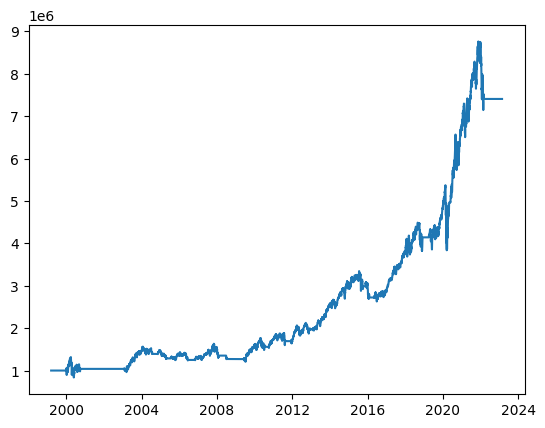

In [30]:
#plt.plot(bt.balance['Date'], bt.balance['Total'])
plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'])
#plt.plot(qqq.data.index, qqq.data['Close'], qqq.data['ShortMA'], qqq.data['LongMA'])